In [1]:
from sklearn.datasets import load_wine
data = load_wine()
data.target[[10, 80, 140]]

#list(data.target_names)

array([0, 1, 2])

In [4]:
import pandas as pd

In [8]:
income = pd.read_csv('adult.csv')

In [9]:
income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [12]:
income.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
income.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

In [18]:
for item in income.columns:
    if '?' in set(income[item]):
        print(item)

workclass
occupation
native.country


In [19]:
set(income.workclass)

{'?',
 'Federal-gov',
 'Local-gov',
 'Never-worked',
 'Private',
 'Self-emp-inc',
 'Self-emp-not-inc',
 'State-gov',
 'Without-pay'}

In [20]:
set(income.occupation)

{'?',
 'Adm-clerical',
 'Armed-Forces',
 'Craft-repair',
 'Exec-managerial',
 'Farming-fishing',
 'Handlers-cleaners',
 'Machine-op-inspct',
 'Other-service',
 'Priv-house-serv',
 'Prof-specialty',
 'Protective-serv',
 'Sales',
 'Tech-support',
 'Transport-moving'}

In [62]:
country_counts = income['native.country'].value_counts()
country_counts

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [72]:
country_counts_df = country_counts.to_frame(name='counts')
small = list(country_counts_df[country_counts_df.counts<100].index)
small

['Cuba',
 'England',
 'Jamaica',
 'South',
 'China',
 'Italy',
 'Dominican-Republic',
 'Vietnam',
 'Guatemala',
 'Japan',
 'Poland',
 'Columbia',
 'Taiwan',
 'Haiti',
 'Iran',
 'Portugal',
 'Nicaragua',
 'Peru',
 'France',
 'Greece',
 'Ecuador',
 'Ireland',
 'Hong',
 'Trinadad&Tobago',
 'Cambodia',
 'Thailand',
 'Laos',
 'Yugoslavia',
 'Outlying-US(Guam-USVI-etc)',
 'Honduras',
 'Hungary',
 'Scotland',
 'Holand-Netherlands']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9532BA0F0>,
      dtype=object)

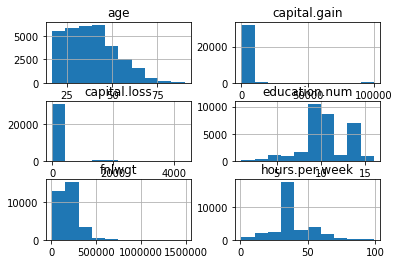

In [64]:
income.hist()

In [81]:
income[income['native.country']=='?'].income.value_counts()

<=50K    437
>50K     146
Name: income, dtype: int64

In [93]:
aa = small_pop.groupby(['native.country','income']).count().age#.hist()

In [105]:
aa = aa.to_frame()

In [113]:
aa.index

MultiIndex([(                  'Cambodia', '<=50K'),
            (                  'Cambodia',  '>50K'),
            (                     'China', '<=50K'),
            (                     'China',  '>50K'),
            (                  'Columbia', '<=50K'),
            (                  'Columbia',  '>50K'),
            (                      'Cuba', '<=50K'),
            (                      'Cuba',  '>50K'),
            (        'Dominican-Republic', '<=50K'),
            (        'Dominican-Republic',  '>50K'),
            (                   'Ecuador', '<=50K'),
            (                   'Ecuador',  '>50K'),
            (                   'England', '<=50K'),
            (                   'England',  '>50K'),
            (                    'France', '<=50K'),
            (                    'France',  '>50K'),
            (                    'Greece', '<=50K'),
            (                    'Greece',  '>50K'),
            (                 'Guatemala', '<=

In [122]:
aa = aa.reset_index()

In [128]:
from matplotlib import pyplot as plt

In [134]:
aa

,native.country,income,age
0,Cambodia,<=50K,12
1,Cambodia,>50K,7
2,China,<=50K,55
3,China,>50K,20
4,Columbia,<=50K,57
...,...,...,...
59,Trinadad&Tobago,>50K,2
60,Vietnam,<=50K,62
61,Vietnam,>50K,5
62,Yugoslavia,<=50K,10


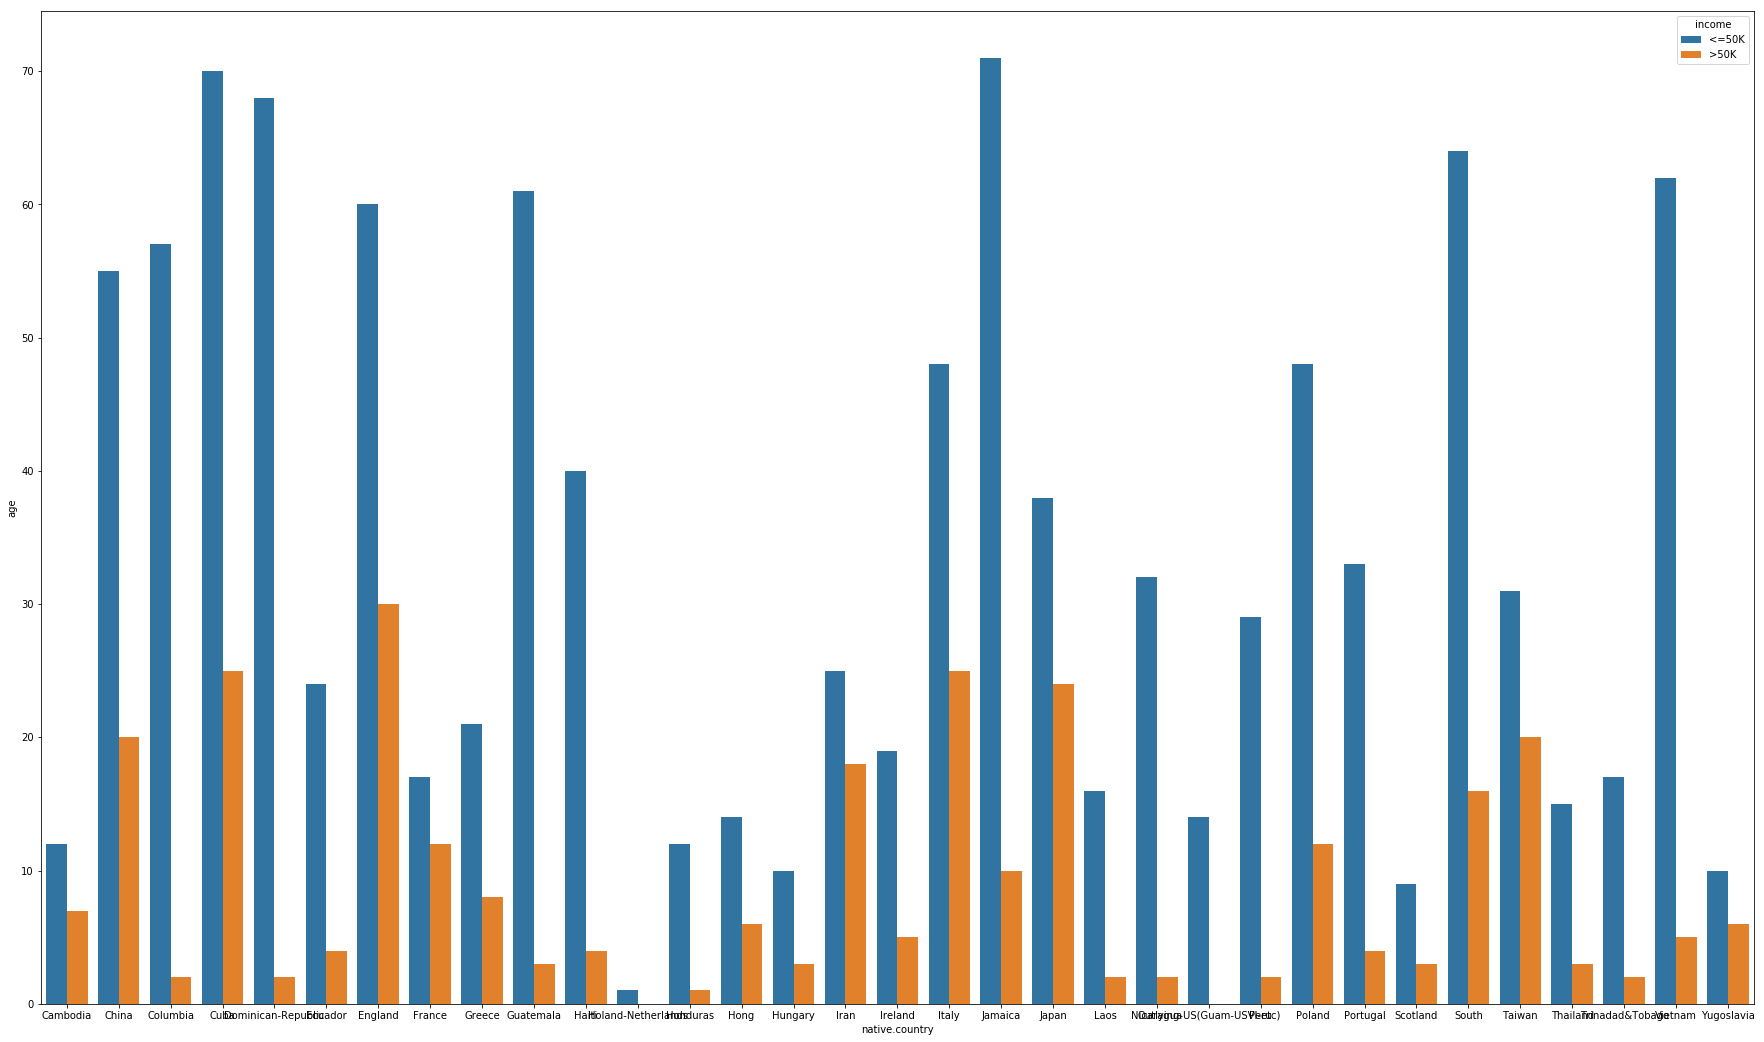

In [133]:
a4_dims = (30.7, 18.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='native.country',y='age',data=aa,hue='income')


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1=
df2=pd.DataFrame({'x':[4,1,2,5,3],'y':[54,12,65,12,8]})
df1['hue']=1
df2['hue']=2
res=pd.concat([df1,df2])
plt.show()

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="ticks", color_codes=True)


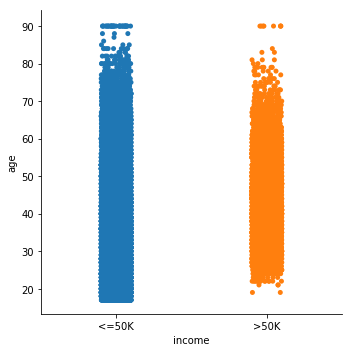

In [68]:
sns.catplot(x="income", y="age", data=income)

In [76]:
small_pop = income[income['native.country'].apply(lambda x:x in small)]

In [ ]:
small_pop.income.hist()

In [79]:
small_pop.income.value_counts()

<=50K    1103
>50K      286
Name: income, dtype: int64

In [80]:
income.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

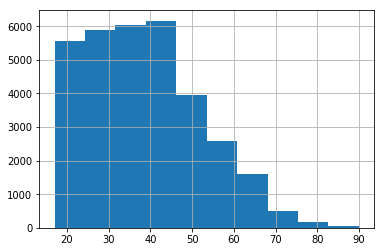

In [69]:
income.age.hist()

In [70]:
income.age.describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [39]:
income.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [40]:
taiwan.income.value_counts()

<=50K    31
>50K     20
Name: income, dtype: int64

In [3]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [2]:
X = data.data
y = data.target

In [3]:
type(X)

numpy.ndarray

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [6]:
X_train.shape

(119, 13)

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X_train,y_train, cv=10)


array([0.92307692, 0.92307692, 0.92307692, 0.83333333, 0.91666667,
       0.91666667, 0.91666667, 1.        , 0.90909091, 1.        ])

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X_train,y_train, cv=10)


array([0.92307692, 0.92307692, 0.92307692, 0.83333333, 0.91666667,
       0.91666667, 0.91666667, 1.        , 0.90909091, 1.        ])

In [25]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 3), random_state=1)

cross_val_score(clf, X_train,y_train, cv=10)


array([0.38461538, 0.38461538, 0.38461538, 0.41666667, 0.41666667,
       0.41666667, 0.41666667, 0.36363636, 0.36363636, 0.4       ])

In [22]:
from sklearn.preprocessing import StandardScaler  # doctest: +SKIP
scaler = StandardScaler()  # doctest: +SKIP
# Don't cheat - fit only on training data
scaler.fit(X_train)  # doctest: +SKIP
X_train = scaler.transform(X_train)  # doctest: +SKIP
# apply same transformation to test data
X_test = scaler.transform(X_test)  # doctest: +SKIP

In [23]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 3), random_state=1)

cross_val_score(clf, X_train,y_train, cv=10)


array([0.92307692, 1.        , 1.        , 1.        , 1.        ,
       0.91666667, 1.        , 1.        , 1.        , 1.        ])

## GBM

In [26]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
X, y = make_classification(random_state=0)

clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)

# clf.predict(X_test[:2])

# clf.score(X_test, y_test)
cross_val_score(clf, X_train,y_train, cv=10)


array([1.        , 1.        , 0.92307692, 0.75      , 0.91666667,
       0.91666667, 0.91666667, 1.        , 1.        , 1.        ])

## svm

#### without normalization

In [10]:
from sklearn import svm

clf = svm.SVC(gamma='scale')
clf.fit(X, y)

cross_val_score(clf, X_train,y_train, cv=10)


array([0.61538462, 0.61538462, 0.69230769, 0.66666667, 0.83333333,
       0.75      , 0.75      , 0.72727273, 0.63636364, 0.6       ])

In [11]:
from sklearn import svm

clf = svm.SVC(gamma='auto')
clf.fit(X, y)

cross_val_score(clf, X_train,y_train, cv=10)


array([0.38461538, 0.38461538, 0.38461538, 0.5       , 0.5       ,
       0.41666667, 0.5       , 0.45454545, 0.36363636, 0.4       ])

#### after standarization

In [12]:
from sklearn.preprocessing import StandardScaler  # doctest: +SKIP
scaler = StandardScaler()  # doctest: +SKIP
# Don't cheat - fit only on training data
scaler.fit(X_train)  # doctest: +SKIP
X_train = scaler.transform(X_train)  # doctest: +SKIP
# apply same transformation to test data
X_test = scaler.transform(X_test)  # doctest: +SKIP

In [14]:
from sklearn import svm

clf = svm.SVC(gamma='scale')
clf.fit(X, y)

cross_val_score(clf, X_train,y_train, cv=10)


array([1.        , 1.        , 0.92307692, 0.91666667, 1.        ,
       0.91666667, 0.91666667, 1.        , 1.        , 0.9       ])

In [15]:
from sklearn import svm

clf = svm.SVC(gamma='auto')
clf.fit(X, y)

cross_val_score(clf, X_train,y_train, cv=10)


array([1.        , 1.        , 0.92307692, 0.91666667, 1.        ,
       0.91666667, 0.91666667, 1.        , 1.        , 0.9       ])

In [16]:
clf = svm.SVC(decision_function_shape='ovo',gamma='auto')
clf.fit(X_train, y_train)
cross_val_score(clf, X_train,y_train, cv=10)


array([1.        , 1.        , 0.92307692, 0.91666667, 1.        ,
       0.91666667, 0.91666667, 1.        , 1.        , 0.9       ])

#### linear separator

In [17]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
cross_val_score(lin_clf, X_train,y_train, cv=10)


array([1.        , 0.92307692, 1.        , 0.91666667, 1.        ,
       0.91666667, 1.        , 1.        , 1.        , 1.        ])

## knn

In [18]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
cross_val_score(neigh, X_train,y_train, cv=10)


array([0.84615385, 0.92307692, 1.        , 0.83333333, 1.        ,
       0.91666667, 0.91666667, 1.        , 0.90909091, 0.9       ])